In [2]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sqlite3 import Error
from sklearn.ensemble import RandomForestClassifier
import pickle
%matplotlib inline

In [3]:
import json
DATA_LOC = 'data/'
FILE_NAME = 'data_train.json'

# Load in JSON files and extract from JSON
reviews_json = open(DATA_LOC + FILE_NAME, 'r')
reviews = json.load(reviews_json)

# Analyze the distribution of stars and reviews as seperate lists
texts = [review['text'] for review in reviews] # Features
stars = [review['stars'] for review in reviews] # Labels

df = {'Text' : texts, 'Stars' : stars}
df = pd.DataFrame(df)

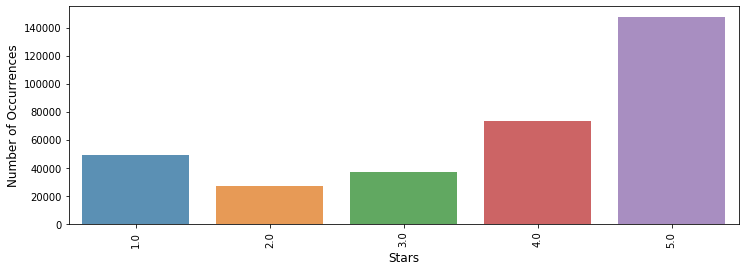

In [4]:
import seaborn as sns
cnt_pro = df['Stars'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Stars', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [5]:
stemmer = PorterStemmer()
words = stopwords.words("english")
df['Cleaned'] = df['Text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [6]:
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))

In [7]:
X = df['Cleaned']
Y = df['Stars']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [8]:
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', RandomForestClassifier())])
# fitting our model and save it in a pickle for later use
model = pipeline.fit(X_train, y_train)
ytest = np.array(y_test)

/Users/oasysokubo/opt/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [9]:
# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.62      0.74      0.67     12170
         2.0       0.28      0.13      0.17      6708
         3.0       0.35      0.23      0.28      9334
         4.0       0.40      0.36      0.38     18386
         5.0       0.68      0.80      0.74     36976

    accuracy                           0.58     83574
   macro avg       0.47      0.45      0.45     83574
weighted avg       0.54      0.58      0.55     83574

[[ 8948   708   543   631  1340]
 [ 2393   842  1126  1101  1246]
 [ 1197   776  2130  2894  2337]
 [  822   455  1613  6565  8931]
 [ 1023   232   739  5333 29649]]
